# Data Preprocessing Tests
## Yue 'Luna' Huang
### Nov 13, 2017

This script checks and plots all the preprocessed files before moving on to merge all the data and produce a training dataset.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdal, osr
from datetime import datetime

In [2]:
assert sys.version_info[0] >= 3, "Python 3 or a more recent version is required."

**Input file information in the cell below.**

In [3]:
os.getcwd()

'/home/maxjiang/yogasaur/codes/merger'

In [40]:
# file info
# file_path = "/home/maxjiang/yogasaur/data/processed/evi/"
# file_name = "2005-01-09_MODIS_EVI-UL.tif"
# file_path = "/home/maxjiang/yogasaur/data/processed/aodana/"
# file_name = "2009-09-08_MERRA2_CLOUD.tif"

file_path = "/home/maxjiang/yogasaur/data/processed/U2M/"
file_name = "2010-02-14_MERRA2_U2M.tif"

**Checks**

In [41]:
# check 1: file naming convention
file_info = file_name.split(".")[0]
date, dataset, variable = file_info.split("_")
# date parsing
print("date parsed: ", datetime.strptime(date, "%Y-%m-%d").strftime("%Y-%m-%d"))
print("dataset: ", dataset)
print("variable name: ", variable)

date parsed:  2010-02-14
dataset:  MERRA2
variable name:  U2M


In [42]:
# check 2: properly load GEOTIFF file
raster = gdal.Open(os.path.join(file_path, file_name)).ReadAsArray()

In [43]:
# check 3: dimension correct
assert raster.shape == (650, 400), "Dimension Mismatch."

In [44]:
raster.shape

(650, 400)

Total number of missing values: 0 out of 260000, Rate: 0.00%


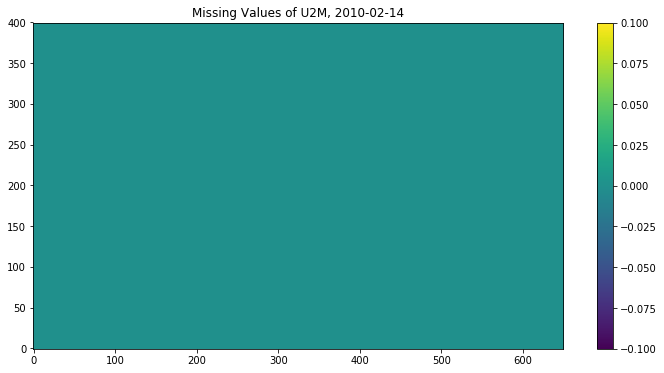

This probably would look like the map of China (not flipped in any way), but not necessarily.


In [45]:
# check 4: missing values
missing = np.isnan(raster.T)
print("Total number of missing values: {} out of {}, Rate: {:.2f}%".format(
    np.sum(missing), 650 * 400, 100 * np.sum(missing) / (650 * 400)))
# visualize
plt.figure(figsize=(12, 6))
plt.title("Missing Values of " + variable + ", " + date)
# plt.imshow(missing.T, origin='lower')
plt.imshow(missing, origin='lower')
plt.colorbar()
plt.show()
print("This probably would look like the map of China (not flipped in any way), but not necessarily.")

In [46]:
raster.T.shape

(400, 650)

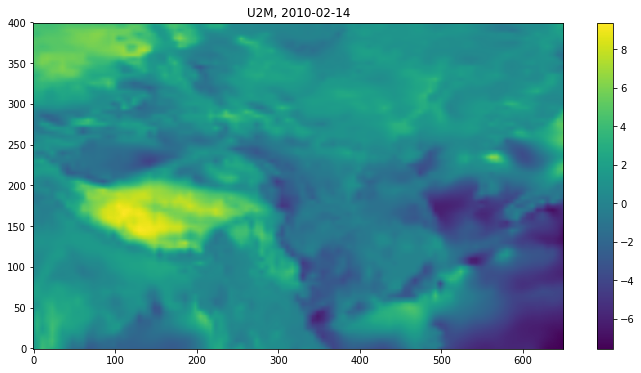

This map should not be flipped in any way. Missing values (e.g. over the sea) should be shown as white.


In [47]:
# check 5: plot values
plt.figure(figsize=(12, 6))
plt.title(variable + ", " + date)
# plt.imshow(raster.T, origin='lower')
plt.imshow(raster.T, origin='lower')
plt.colorbar()
plt.show()
print("This map should not be flipped in any way. Missing values (e.g. over the sea) should be shown as white.")

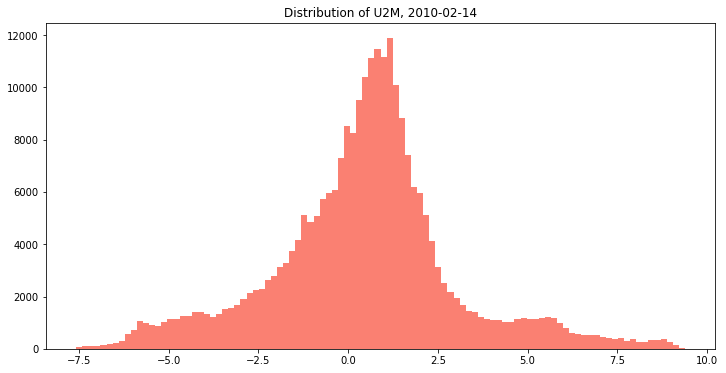

Any weird outliers? Does the scale of the data make sense? What is the unit of observation?


In [48]:
# check 6: plot value distributions
flatten = raster.flatten()
flatten = flatten[~np.isnan(flatten)]

plt.figure(figsize=(12, 6))
plt.title("Distribution of " + variable + ", " + date)
plt.hist(flatten, bins=100, color='salmon')
plt.show()
print("Any weird outliers? Does the scale of the data make sense? What is the unit of observation?")